In [ ]:
# Q1) Given to us is the data of crimes in different regions .
# We need to Perform different Clustering techniques.

# i) Hierarchical Clustering
# ii) K Means Clustering
# iii) DBSCAN Clustering Technique.



# First,we start with Hierarchical clustering.

# i) Hierarchical Clustering


**Hierarchical Clustering**

In [ ]:
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd

In [ ]:
# Loading the dataset
from google.colab import files
files=files.upload()


Saving crime_data.csv to crime_data (2).csv


In [ ]:
# read the dataset
crime_data = pd.read_csv('crime_data.csv')
crime_data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [ ]:
crime_data.corr()

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


By finding correlation, we see that Murser and Assault crimes share a high correlation amoung each other.

# First of all , we need to find the MinMax function

In [ ]:
def minmax_func(i):
  x = (i-i.min())/(i.max()-i.min())
  return x

# Then , we apply the function to the data

In [ ]:
df_norm = minmax_func(crime_data.iloc[:,1:])
df_norm

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


# Creating the Dendogram

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [75.0, 75.0, 85.0, 85.0],
  [65.0, 65.0, 80.0, 80.0],
  [55.0, 55.0, 72.5, 72.5],
  [32.5, 32.5, 63.75, 63.75],
  [10.0, 10.0, 48.125, 48.125],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [29.0625, 29.0625, 102.5, 102.5],
  [135.0, 135.0, 145.0, 145.0],
  [155.0, 155.0, 165.0, 165.0],
  [140.0, 140.0, 160.0, 160.0],
  [185.0, 185.0, 195.0, 195.0],
  [175.0, 175.0, 190.0, 190.0],
  [150.0, 150.0, 182.5, 182.5],
  [125.0, 125.0, 166.25, 166.25],
  [65.78125, 65.78125, 145.625, 145.625],
  [205.0, 205.0, 215.0, 215.0],
  [225.0, 225.0, 235.0, 235.0],
  [210.0, 210.0, 230.0, 230.0],
  [255.0, 255.0, 265.0, 265.0],
  [245.0, 245.0, 260.0, 260.0],
  [285.0, 285.0, 295.0, 295.0],
  [275.0, 275.0, 290.0, 290.0],
  [252.5, 252.5, 282.5, 282.5],
  [220.0, 220.0, 267.5, 267.5],
  [305.0, 305.0, 315.0, 315.0],
  [325.0, 325.0, 335.0, 335.0],
  [355.0, 355.0, 365.0, 365.0],
  [345.0, 34

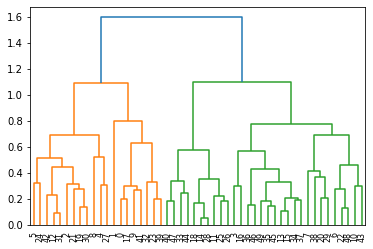

In [ ]:
dendogram = sch.dendrogram(sch.linkage(df_norm,method='complete'))
dendogram

From the Dendogram, we decide to create 4 clusters,thinking 4 clusters would be appropriate one to diffeerentiate others.

In [ ]:
# Creating Clusters

hc = AgglomerativeClustering(n_clusters = 4,affinity='euclidean',linkage='complete')
hc

AgglomerativeClustering(linkage='complete', n_clusters=4)

In [ ]:
y_hc = hc.fit_predict(df_norm)
y_hc

array([0, 0, 3, 1, 3, 3, 1, 1, 3, 0, 1, 2, 3, 1, 2, 1, 1, 0, 2, 3, 1, 3,
       1, 0, 3, 2, 2, 3, 2, 1, 3, 3, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 3, 1,
       2, 1, 1, 2, 1, 1])

In [ ]:
crime_data['crime_clusterid'] = y_hc
crime_data 

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,crime_clusterid
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,3
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,3
5,Colorado,7.9,204,78,38.7,3
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,3
9,Georgia,17.4,211,60,25.8,0


In [ ]:
# grouping the clusters in cluster id 0

crime_data[crime_data['crime_clusterid']==0]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,crime_clusterid
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
9,Georgia,17.4,211,60,25.8,0
17,Louisiana,15.4,249,66,22.2,0
23,Mississippi,16.1,259,44,17.1,0
32,North Carolina,13.0,337,45,16.1,0
39,South Carolina,14.4,279,48,22.5,0
41,Tennessee,13.2,188,59,26.9,0


In [ ]:
# Grouping the clusters of id 1
crime_data[crime_data['crime_clusterid']==1]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,crime_clusterid
3,Arkansas,8.8,190,50,19.5,1
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
10,Hawaii,5.3,46,83,20.2,1
13,Indiana,7.2,113,65,21.0,1
15,Kansas,6.0,115,66,18.0,1
16,Kentucky,9.7,109,52,16.3,1
20,Massachusetts,4.4,149,85,16.3,1
22,Minnesota,2.7,72,66,14.9,1
29,New Jersey,7.4,159,89,18.8,1


In [ ]:
# Grouping the clusters in id 2.
crime_data[crime_data['crime_clusterid']==2]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,crime_clusterid
11,Idaho,2.6,120,54,14.2,2
14,Iowa,2.2,56,57,11.3,2
18,Maine,2.1,83,51,7.8,2
25,Montana,6.0,109,53,16.4,2
26,Nebraska,4.3,102,62,16.5,2
28,New Hampshire,2.1,57,56,9.5,2
33,North Dakota,0.8,45,44,7.3,2
40,South Dakota,3.8,86,45,12.8,2
44,Vermont,2.2,48,32,11.2,2
47,West Virginia,5.7,81,39,9.3,2


In [ ]:
crime_data[crime_data['crime_clusterid']==3]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,crime_clusterid
2,Arizona,8.1,294,80,31.0,3
4,California,9.0,276,91,40.6,3
5,Colorado,7.9,204,78,38.7,3
8,Florida,15.4,335,80,31.9,3
12,Illinois,10.4,249,83,24.0,3
19,Maryland,11.3,300,67,27.8,3
21,Michigan,12.1,255,74,35.1,3
24,Missouri,9.0,178,70,28.2,3
27,Nevada,12.2,252,81,46.0,3
30,New Mexico,11.4,285,70,32.1,3


In [ ]:
# Taking the groupby mean
crime_data.groupby('crime_clusterid').mean()

,Murder,Assault,UrbanPop,Rape
crime_clusterid,,,,
0,14.087500,252.750000,53.500000,24.5375
1,5.715000,132.300000,70.800000,18.1000
2,3.180000,78.700000,49.300000,11.6300
3,10.883333,256.916667,78.333333,32.2500


# Since, there is no significant change in the values,we decide that taking 4 clusters is good in differntiating the different types of crimes that happen in the states.

Conclusion:

We see that crime cluster id or groups 0 and 3 share a similarity across the types of crimes and cluster groups 1 and 2 share a good similarity amoung the 
types of crime.

**K Means Algorithm**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving crime_data.csv to crime_data (1).csv


In [ ]:
# read the dataset
crime_data = pd.read_csv('crime_data.csv')
crime_data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In K means algorithm , we need to find the normalised values for each of the columns.

In [ ]:
# First,we define a normal distribution function 
# From Z score techniques:

# z = (x-(mean))/(standard_deviation)

def norm_func(i):
  x = (i-i.mean())/(i.std())
  return x

In [ ]:
# Now, apply this function in the given dataset.

x = norm_func(crime_data.iloc[:,1:])
x

,Murder,Assault,UrbanPop,Rape
0,1.242564,0.782839,-0.520907,-0.003416
1,0.507862,1.106823,-1.211764,2.484203
2,0.071633,1.478803,0.998980,1.042878
3,0.232349,0.230868,-1.073593,-0.184917
4,0.278268,1.262814,1.758923,2.067820
5,0.025715,0.398859,0.860809,1.864967
6,-1.030419,-0.729082,0.791723,-1.081741
7,-0.433474,0.806838,0.446294,-0.579946
8,1.747671,1.970778,0.998980,1.138967
9,2.206860,0.482855,-0.382735,0.487702


# To decide the no.of Clusters in the data, we shall create Elbow Chart

Elbow Chart

In [ ]:
# Creating an Elbow Chart

[195.99999999999997, 102.86240049441733, 78.48708409555627, 56.40317345829281, 49.50986021484367, 43.04891476407622, 39.71139791909336, 33.993640629892106, 32.05235173660421, 27.745406609180094]


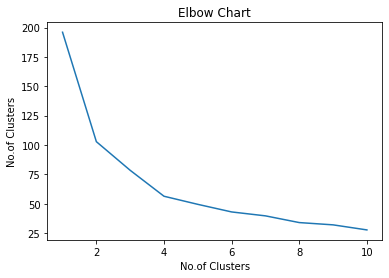

In [ ]:
# WCSS (Within Cluster Sum of Squares)

wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i,random_state = 0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

print(wcss)  
plt.plot(range(1,11),wcss)
plt.title('Elbow Chart')
plt.xlabel('No.of Clusters')
plt.ylabel("No.of Clusters")
plt.show()

From the Elbow chart , we see that there is a sharp edge at 4.
Therefore, we decide that the no.of clusters is 4.

Build Cluster Algorithm

In [ ]:
from sklearn.cluster import KMeans
clusters_new = KMeans(4,random_state=0)
clusters_new.fit(x)

KMeans(n_clusters=4, random_state=0)

In [ ]:
clusters_new.labels_

array([3, 1, 1, 3, 1, 1, 0, 0, 1, 3, 0, 2, 1, 0, 2, 0, 2, 3, 2, 1, 0, 1,
       2, 3, 1, 2, 2, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0,
       2, 0, 0, 2, 2, 0], dtype=int32)

In [ ]:
crime_data['clusterid_new'] = clusters_new.labels_
crime_data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusterid_new
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,3
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,3


In [ ]:
crime_data.groupby('clusterid_new').agg(['mean'])

,Murder,Assault,UrbanPop,Rape
,mean,mean,mean,mean
clusterid_new,,,,
0,5.656250,138.875000,73.875000,18.781250
1,10.815385,257.384615,76.000000,33.192308
2,3.600000,78.538462,52.076923,12.176923
3,13.937500,243.625000,53.750000,21.412500


In [ ]:
# Redefining the Clusterid

crime_data['clusterid_new'] = crime_data['clusterid_new'].replace(0,'Cluster - 0')
crime_data['clusterid_new'] = crime_data['clusterid_new'].replace(1,'Cluster - 1')
crime_data['clusterid_new'] = crime_data['clusterid_new'].replace(2,'Cluster - 2')
crime_data['clusterid_new'] = crime_data['clusterid_new'].replace(3,'Cluster - 3')

crime_data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusterid_new
0,Alabama,13.2,236,58,21.2,Cluster3
1,Alaska,10.0,263,48,44.5,Cluster1
2,Arizona,8.1,294,80,31.0,Cluster1
3,Arkansas,8.8,190,50,19.5,Cluster3
4,California,9.0,276,91,40.6,Cluster1
5,Colorado,7.9,204,78,38.7,Cluster1
6,Connecticut,3.3,110,77,11.1,Cluster0
7,Delaware,5.9,238,72,15.8,Cluster0
8,Florida,15.4,335,80,31.9,Cluster1
9,Georgia,17.4,211,60,25.8,Cluster3


In [ ]:
crime_data.groupby('clusterid_new').agg(['mean'])

,Murder,Assault,UrbanPop,Rape
,mean,mean,mean,mean
clusterid_new,,,,
Cluster0,5.656250,138.875000,73.875000,18.781250
Cluster1,10.815385,257.384615,76.000000,33.192308
Cluster2,3.600000,78.538462,52.076923,12.176923
Cluster3,13.937500,243.625000,53.750000,21.412500


In [ ]:
crime_data.columns

Index(['Unnamed: 0', 'Murder', 'Assault', 'UrbanPop', 'Rape', 'clusterid_new'], dtype='object')

In [ ]:
crime_data['clusterid_new'].value_counts()

Cluster0    16
Cluster1    13
Cluster2    13
Cluster3     8
Name: clusterid_new, dtype: int64

In [ ]:
# DBSCAN TECHNIQUE


In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving crime_data.csv to crime_data (1).csv


In [ ]:
df = pd.read_csv('crime_data.csv')
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [ ]:
data=df.iloc[:,1:]
data

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [ ]:
stscalar = StandardScaler().fit(data)
X=stscalar.transform(data)
X.reshape(1,-1)

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116,  0.51301858,
         1.11805959, -1.22406668,  2.50942392,  0.07236067,  1.49381682,
         1.00912225,  1.05346626,  0.23470832,  0.23321191, -1.08449238,
        -0.18679398,  0.28109336,  1.2756352 ,  1.77678094,  2.08881393,
         0.02597562,  0.40290872,  0.86954794,  1.88390137, -1.04088037,
        -0.73648418,  0.79976079, -1.09272319, -0.43787481,  0.81502956,
         0.45082502, -0.58583422,  1.76541475,  1.99078607,  1.00912225,
         1.1505301 ,  2.22926518,  0.48775713, -0.38662083,  0.49265293,
        -0.57702994, -1.51224105,  1.21848371, -0.11129987, -1.20322802,
        -0.61527217, -0.80534376, -0.75839217,  0.60578867,  0.94836277,
         1.21848371,  0.29852525, -0.13637203, -0.70012057, -0.03768506,
        -0.0250209 , -1.29599811, -1.39102904, -0.5959823 , -1.07115345,
        -0.41468229, -0.67587817,  0.03210209, -0.34856705,  0.44344101,
        -0.74860538, -0.94491807, -0.53190987,  1.7

In [ ]:
dbscan = DBSCAN(eps=1.73,min_samples=12)
dbscan.fit(X)


DBSCAN(eps=1.73, min_samples=12)

In [ ]:
dbscan.labels_

array([ 0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

In [ ]:
df['Cluster']=pd.DataFrame(dbscan.labels_)
df[0:5]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Cluster
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0


In [ ]:
df['Cluster'].value_counts()

 0    49
-1     1
Name: Cluster, dtype: int64

In [ ]:
(len(df[df['Cluster']==-1])/len(df))*100

2.0

In [ ]:
# Silhoutte Score Calculation

X = metrics.silhouette_score(X,dbscan.labels_)
X

0.23455598753159795

The Silhoutte Score of 0.234 , which is taken as near to 0,indicates that the 
Clusters are overlapping each other.

    OVERALL INFERENCES FROM THE CRIME_DATA:

    i) The Highest number of Murder Crime occures in Cluster 3
    ii) The Highest Number of Assault Crimes occur in Cluster 1.
    iii)The Highest Number of Urban population is in Cluster 1.
    iv)The Highest no.Rape Cases are in Cluster 1.
    v)Muder and Assault Crimes are the highest no.of cases registered in the cities.
